# How does remote work impact the data job market?

#### Methodology
1. Compare remote vs on-site job availability across data roles
2. Analyze salary differences between remote and on-site positions
3. Compare the most demanded skills for remote vs on-site Data Analyst roles

## Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data
df = pd.read_csv('../Project/data/job_postings_flat.csv')

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for 2025 data
df = df[df['job_posted_date'].dt.year == 2025]

## Filter for US Jobs

In [2]:
df_US = df[df['job_country'] == 'United States']

## Remote vs On-site Distribution by Role

See how the proportion of remote work varies across the top 6 data roles.

Get the top 6 job titles and calculate the percentage of remote postings for each.

In [3]:
top_titles = df_US['job_title_short'].value_counts().head(6).index.tolist()
df_top = df_US[df_US['job_title_short'].isin(top_titles)].copy()

# Calculate remote percentage per role
df_remote_pct = df_top.groupby('job_title_short')['job_work_from_home'].mean().sort_values(ascending=True) * 100

df_remote_pct

job_title_short
Data Scientist          1.091442
Data Analyst            1.139880
Senior Data Analyst     1.351952
Business Analyst        1.405811
Senior Data Engineer    3.291284
Data Engineer           3.510752
Name: job_work_from_home, dtype: float64

### Plot Remote Percentage by Role

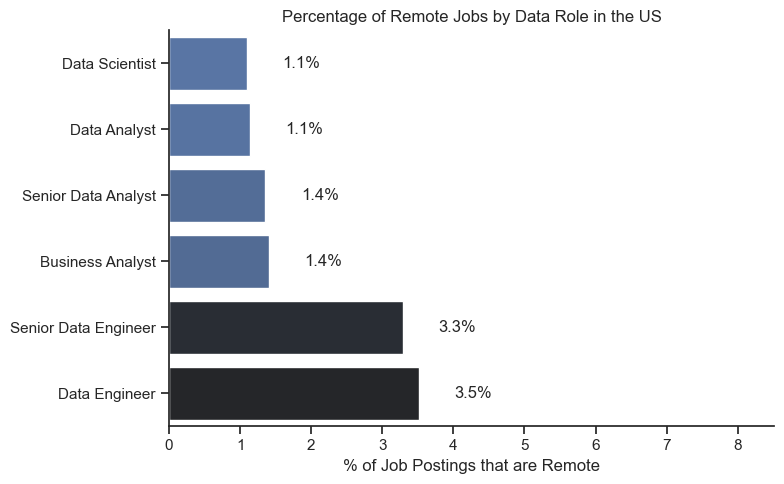

In [4]:
sns.set_theme(style='ticks')
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=df_remote_pct.values, y=df_remote_pct.index, hue=df_remote_pct.values, palette='dark:b_r', legend=False)
sns.despine()

for i, v in enumerate(df_remote_pct.values):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center')

plt.title('Percentage of Remote Jobs by Data Role in the US')
plt.xlabel('% of Job Postings that are Remote')
plt.ylabel('')
plt.xlim(0, df_remote_pct.max() + 5)
plt.tight_layout()
plt.savefig('images/Remote_Percentage_by_Data_Role_in_the_US.png', dpi=100, bbox_inches='tight')
plt.show()

## Salary: Remote vs On-site for Data Analysts

Compare salary distributions between remote and on-site Data Analyst positions.

Filter for US Data Analysts with salary data and label each row as Remote or On-site.

In [5]:
df_DA_US = df_US[(df_US['job_title_short'] == 'Data Analyst')].dropna(subset=['salary_year_avg']).copy()
df_DA_US['work_type'] = df_DA_US['job_work_from_home'].map({True: 'Remote', False: 'On-site'})

df_DA_US[['job_title_short', 'salary_year_avg', 'work_type']].head()

,job_title_short,salary_year_avg,work_type
1269573,Data Analyst,93800.0,On-site
1269834,Data Analyst,106500.0,On-site
1270472,Data Analyst,150000.0,On-site
1271347,Data Analyst,75500.0,On-site
1272671,Data Analyst,90000.0,On-site


Check the median salary for each work type.

In [6]:
df_DA_US.groupby('work_type')['salary_year_avg'].median()

work_type
On-site    95000.000000
Remote     96343.539062
Name: salary_year_avg, dtype: float64

### Plot Salary Distributions

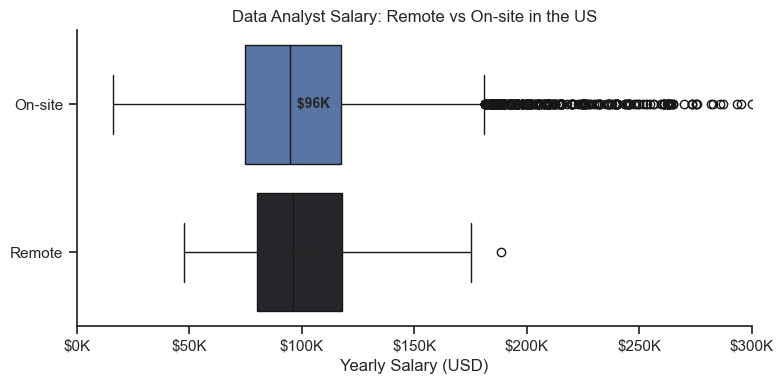

In [7]:
sns.set_theme(style='ticks')
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(data=df_DA_US, x='salary_year_avg', y='work_type', palette='dark:b_r', hue='work_type', legend=False)
sns.despine()

plt.title('Data Analyst Salary: Remote vs On-site in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Add median labels
medians = df_DA_US.groupby('work_type')['salary_year_avg'].median()
for i, work_type in enumerate(['Remote', 'On-site']):
    median_val = medians[work_type]
    ax.text(median_val, i, f' ${int(median_val/1000)}K', va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('images/Salary_Remote_vs_Onsite_Data_Analysts_in_the_US.png', dpi=100, bbox_inches='tight')
plt.show()

## Skills: Remote vs On-site for Data Analysts

Compare the top skills requested in remote vs on-site Data Analyst postings.

Use the full Data Analyst dataset (not just those with salary) to get a better picture of skill demand. Label each posting and explode the skills.

In [8]:
df_DA_US_all = df_US[df_US['job_title_short'] == 'Data Analyst'].copy()
df_DA_US_all['work_type'] = df_DA_US_all['job_work_from_home'].map({True: 'Remote', False: 'On-site'})

df_skills = df_DA_US_all.explode('job_skills')

df_skills[['job_title_short', 'work_type', 'job_skills']].head(10)

,job_title_short,work_type,job_skills
1268007,Data Analyst,On-site,excel
1268008,Data Analyst,On-site,python
1268008,Data Analyst,On-site,sql
1268009,Data Analyst,On-site,sql
1268009,Data Analyst,On-site,excel
1268009,Data Analyst,On-site,tableau
1268009,Data Analyst,On-site,flow
1268010,Data Analyst,On-site,excel
1268011,Data Analyst,On-site,sql
1268011,Data Analyst,On-site,java


Calculate the top 10 skills and their percentage for each work type.

In [9]:
for work_type in ['Remote', 'On-site']:
    df_type = df_skills[df_skills['work_type'] == work_type]
    total = df_DA_US_all[df_DA_US_all['work_type'] == work_type].shape[0]
    top = df_type['job_skills'].value_counts().head(5)
    print(f'\n--- {work_type} (total: {total} jobs) ---')
    print((top / total * 100).round(1).to_string())


--- Remote (total: 733 jobs) ---
job_skills
sql         52.3
excel       41.1
python      37.1
tableau     27.0
power bi    20.3

--- On-site (total: 63572 jobs) ---
job_skills
sql         36.0
excel       28.1
python      23.1
tableau     19.8
power bi    17.5


### Plot Skills Comparison

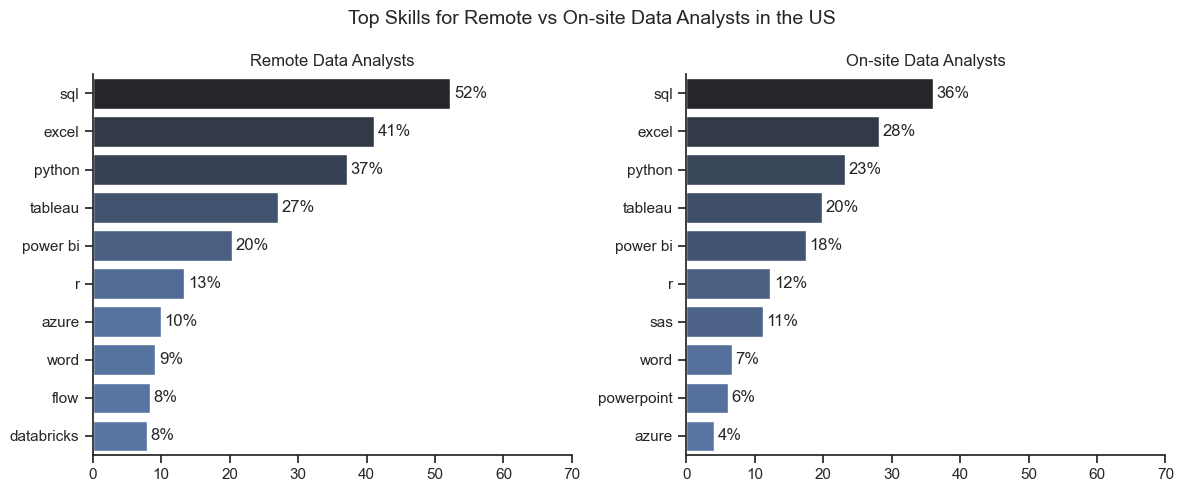

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.set_theme(style='ticks')

for i, work_type in enumerate(['Remote', 'On-site']):
    df_type = df_skills[df_skills['work_type'] == work_type]
    total_jobs = df_DA_US_all[df_DA_US_all['work_type'] == work_type].shape[0]
    
    df_top_skills = (df_type['job_skills']
                     .value_counts()
                     .head(10)
                     .reset_index())
    df_top_skills.columns = ['skill', 'count']
    df_top_skills['percent'] = (df_top_skills['count'] / total_jobs) * 100
    
    sns.barplot(data=df_top_skills, x='percent', y='skill', ax=ax[i], hue='percent', palette='dark:b_r', legend=False)
    ax[i].set_title(f'{work_type} Data Analysts')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 70)
    sns.despine(ax=ax[i])
    
    for n, v in enumerate(df_top_skills['percent']):
        ax[i].text(v + 0.5, n, f'{v:.0f}%', va='center')

fig.suptitle('Top Skills for Remote vs On-site Data Analysts in the US', fontsize=14)
fig.tight_layout(h_pad=1)
plt.savefig('images/Skills_Remote_vs_Onsite_Data_Analysts_in_the_US.png', dpi=100, bbox_inches='tight')
plt.show()